# CIV1498 - Introduction to Data Science
## Project - Toronto Bike Share
## PART I: Data Wrangling and Cleaning
### By: Gneiss Data (Greig Knox and Yoko Yanagimura)

## 0. Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pytz
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
import string

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Centre all the charts displayed in this notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
display: table-cell;
text-align: center;
vertical-align: middle;
}
</style>
""")

# 1. Weather Data - Importing Data

In this section, a dataframe is created containing the weather data from January 2017 to December 2020 collected at the Toronto City Center weather station (Weather Station ID 6158359). The raw weather data was provided in csv format. 

In [8]:
#Get list of Weather Data File Names contained in the repository
weather_filenames = [filename for filename in os.listdir() if '6158359' in filename]
print(weather_filenames[0:5])

# Check the format of the weather data
df_weather_data = pd.read_csv(weather_filenames[0])
df_weather_data.head(10)

['en_climate_hourly_ON_6158359_01-2017_P1H.csv', 'en_climate_hourly_ON_6158359_01-2018_P1H.csv', 'en_climate_hourly_ON_6158359_01-2019_P1H.csv', 'en_climate_hourly_ON_6158359_01-2020_P1H.csv', 'en_climate_hourly_ON_6158359_02-2017_P1H.csv']


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 00:00,2017,1,1,00:00,1.5,...,NaN,16.1,NaN,99.81,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 01:00,2017,1,1,01:00,1.5,...,NaN,16.1,NaN,100.01,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 02:00,2017,1,1,02:00,1.0,...,NaN,16.1,NaN,100.14,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 03:00,2017,1,1,03:00,1.2,...,NaN,16.1,NaN,100.32,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 04:00,2017,1,1,04:00,1.3,...,NaN,16.1,NaN,100.48,NaN,NaN,NaN,NaN,NaN,NaN
5,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 05:00,2017,1,1,05:00,1.0,...,NaN,16.1,NaN,100.55,NaN,NaN,NaN,NaN,NaN,NaN
6,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 06:00,2017,1,1,06:00,0.7,...,NaN,16.1,NaN,100.65,NaN,NaN,NaN,NaN,NaN,NaN
7,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 07:00,2017,1,1,07:00,0.0,...,NaN,16.1,NaN,100.79,NaN,NaN,NaN,-6.0,NaN,NaN
8,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 08:00,2017,1,1,08:00,-0.3,...,NaN,16.1,NaN,100.93,NaN,NaN,NaN,-6.0,NaN,NaN
9,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 09:00,2017,1,1,09:00,-0.1,...,NaN,16.1,NaN,101.06,NaN,NaN,NaN,-6.0,NaN,NaN


Now, the weather data is concatenated into a single dataframe

In [9]:
#Concatenate the weather data from 2017 to 2020 into a single dataframe
df_weather_data = pd.DataFrame()

for file in weather_filenames:
    df_weather_data = pd.concat([df_weather_data,pd.read_csv(file)])

# 2. Weather Data - Data Wrangling

Because the weather data included in the repository are collected from a single weather station, the station information including the station name, station/climate ID, latitude and longitude of the station location, is redundant data and can be removed from the dataframe to reduce the number of columns. We show below what this will look like applied to one of the weather dataset extracted from en_climate_hourly_ON_6158359_08-2020_P1H.csv. The number of column in the dataframe is reduced from 28 to 24. 

In [10]:
#clean column headers
def clean_special_charaters(a_string):
    output = ''
    a_string = a_string.lower()
    for character in a_string:
        if character == ' ' or character == '_':
            output+='_'
        elif character.isalnum():
            output+=character      
    return output
    
#remove all punctuation from column headers
df_weather_data.columns = [ clean_special_charaters(header)  for header in df_weather_data.columns]

df_weather_data.head()

,longitude_x,latitude_y,station_name,climate_id,datetime,year,month,day,time,temp_c,...,wind_spd_flag,visibility_km,visibility_flag,stn_press_kpa,stn_press_flag,hmdx,hmdx_flag,wind_chill,wind_chill_flag,weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 00:00,2017,1,1,00:00,1.5,...,NaN,16.1,NaN,99.81,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 01:00,2017,1,1,01:00,1.5,...,NaN,16.1,NaN,100.01,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 02:00,2017,1,1,02:00,1.0,...,NaN,16.1,NaN,100.14,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 03:00,2017,1,1,03:00,1.2,...,NaN,16.1,NaN,100.32,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 04:00,2017,1,1,04:00,1.3,...,NaN,16.1,NaN,100.48,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Save the weather station information in a dictionary
dic_weather_station_info = {'lon':df_weather_data['longitude_x'].iloc[0],'lat': df_weather_data['latitude_y'].iloc[0], 'name':df_weather_data['station_name'].iloc[0],'id':df_weather_data['climate_id'].iloc[0]}

#Drop the station information, drop 4 columns from the dataframe
df_weather_data = df_weather_data.drop(columns = ['longitude_x','latitude_y','station_name','climate_id'])
print(dic_weather_station_info)


{'lon': -79.4, 'lat': 43.63, 'name': 'TORONTO CITY CENTRE', 'id': 6158359}


Furthermore, it has been identified that the columns with the term "flag" do not contain information required for our analysis. These columns are also removed from the dataframe, further reducing the column number from 24 to 15. 

In [12]:
#Drop list of features that have a nan description
lst_na_description = ['temp_flag','dew_point_temp_flag','rel_hum_flag','wind_dir_flag', 'wind_spd_flag', 'visibility_flag', 'stn_press_flag', 'hmdx_flag','wind_chill_flag']
df_weather_data = df_weather_data.drop(columns = lst_na_description)
print(df_weather_data.shape)
df_weather_data.head()


(35064, 15)


,datetime,year,month,day,time,temp_c,dew_point_temp_c,rel_hum_,wind_dir_10s_deg,wind_spd_kmh,visibility_km,stn_press_kpa,hmdx,wind_chill,weather
0,2017-01-01 00:00,2017,1,1,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,2017-01-01 01:00,2017,1,1,01:00,1.5,-3.9,67.0,27.0,35.0,16.1,100.01,NaN,NaN,NaN
2,2017-01-01 02:00,2017,1,1,02:00,1.0,-4.3,68.0,26.0,32.0,16.1,100.14,NaN,NaN,NaN
3,2017-01-01 03:00,2017,1,1,03:00,1.2,-4.3,67.0,26.0,37.0,16.1,100.32,NaN,NaN,NaN
4,2017-01-01 04:00,2017,1,1,04:00,1.3,-4.4,66.0,26.0,28.0,16.1,100.48,NaN,NaN,NaN


At this point, the weather data has been concatenated into a single dataframe, and the station information and "flag" columns have been dropped from the concatenated dataframe. Below we provide a summary of the percentable of data containing a null value in the dataframe. 

In [13]:
#Percentage of Data Containing Null Record
df_weather_data_missing = pd.DataFrame(df_weather_data.isnull().sum())
df_weather_data_missing = df_weather_data_missing.rename(columns={0:"count"})
df_weather_data_missing['percent_nulldata']=round(df_weather_data_missing['count']/df_weather_data.shape[0] * 100,1)

print("")
print('The number of data records in the data frame is:' ,df_weather_data.shape[0])

df_weather_data_missing


The number of data records in the data frame is: 35064


,count,percent_nulldata
datetime,0,0.0
year,0,0.0
month,0,0.0
day,0,0.0
time,0,0.0
temp_c,459,1.3
dew_point_temp_c,508,1.4
rel_hum_,500,1.4
wind_dir_10s_deg,2385,6.8
wind_spd_kmh,384,1.1


There are 1.3% or 459 Null Temperatures records in the data set. Because temperature is one of the focus features of the dataframe, all records with a NAN temperature should be removed from the data set.

The current dataset indicates that there are 459 records with no temperature data. As temperature of our analysis, these records will be removed from the data frame. This reduced the total number of records in our dataframe from 35064 to 34605.  

In [14]:
df_weather_data = df_weather_data[df_weather_data['temp_c'].notnull()]
print(df_weather_data.shape)
df_weather_data.head()

(34605, 15)


,datetime,year,month,day,time,temp_c,dew_point_temp_c,rel_hum_,wind_dir_10s_deg,wind_spd_kmh,visibility_km,stn_press_kpa,hmdx,wind_chill,weather
0,2017-01-01 00:00,2017,1,1,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,2017-01-01 01:00,2017,1,1,01:00,1.5,-3.9,67.0,27.0,35.0,16.1,100.01,NaN,NaN,NaN
2,2017-01-01 02:00,2017,1,1,02:00,1.0,-4.3,68.0,26.0,32.0,16.1,100.14,NaN,NaN,NaN
3,2017-01-01 03:00,2017,1,1,03:00,1.2,-4.3,67.0,26.0,37.0,16.1,100.32,NaN,NaN,NaN
4,2017-01-01 04:00,2017,1,1,04:00,1.3,-4.4,66.0,26.0,28.0,16.1,100.48,NaN,NaN,NaN


It has also been determined that more than 80% of the Hmdx and Wind Chill are null values. 

Looking into the provided information on https://climate.weather.gc.ca, however, it was determined that hourly humidex values are only displayed when the air temperature is 20 deg C or greater and the humidex value is at least 1 degree greater than the air temperature. Wind Chill is also only displayed when the hourly temperature is less than or equal to 0 deg C. These columns will therefore be left in our dataframe because we have an understanding of when they would be missing from the records.

In [15]:
#Hmdx is only calculated if air temperture is greater than 20 deg and humidex (H_value) is at least 1 deg or more
e = 6.11 * np.exp(5417.7530 * ( (1/273.15) - (1/(df_weather_data['dew_point_temp_c']+273.15))))
df_weather_data['h_value']=(0.5555)*(e - 10.0)

df_weather_data[df_weather_data['hmdx'].notnull()].head()

,datetime,year,month,day,time,temp_c,dew_point_temp_c,rel_hum_,wind_dir_10s_deg,wind_spd_kmh,visibility_km,stn_press_kpa,hmdx,wind_chill,weather,h_value
427,2017-05-18 19:00,2017,5,18,19:00,25.5,16.7,58.0,28.0,28.0,16.1,99.66,31.0,NaN,NaN,5.087083
428,2017-05-18 20:00,2017,5,18,20:00,24.7,15.8,57.0,30.0,24.0,16.1,99.76,29.0,NaN,NaN,4.485201
429,2017-05-18 21:00,2017,5,18,21:00,22.8,13.8,56.0,29.0,17.0,16.1,99.84,26.0,NaN,NaN,3.255232
430,2017-05-18 22:00,2017,5,18,22:00,21.8,13.1,57.0,27.0,18.0,16.1,99.96,25.0,NaN,NaN,2.857706
687,2017-05-29 15:00,2017,5,29,15:00,23.5,9.8,41.0,25.0,28.0,16.1,99.93,25.0,NaN,NaN,1.191371


In [16]:
#Remove the Humidex_Calc column, not needed for future analysis
df_weather_data=df_weather_data.drop(columns = ['h_value'])

In [17]:
#WindChill is Nan for temperatures greater than 0 deg
df_weather_data[df_weather_data['wind_chill'].isnull()].head()

,datetime,year,month,day,time,temp_c,dew_point_temp_c,rel_hum_,wind_dir_10s_deg,wind_spd_kmh,visibility_km,stn_press_kpa,hmdx,wind_chill,weather
0,2017-01-01 00:00,2017,1,1,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,2017-01-01 01:00,2017,1,1,01:00,1.5,-3.9,67.0,27.0,35.0,16.1,100.01,NaN,NaN,NaN
2,2017-01-01 02:00,2017,1,1,02:00,1.0,-4.3,68.0,26.0,32.0,16.1,100.14,NaN,NaN,NaN
3,2017-01-01 03:00,2017,1,1,03:00,1.2,-4.3,67.0,26.0,37.0,16.1,100.32,NaN,NaN,NaN
4,2017-01-01 04:00,2017,1,1,04:00,1.3,-4.4,66.0,26.0,28.0,16.1,100.48,NaN,NaN,NaN


It is also noted that 84% of the data in the Weather column are also null. The weather field in this dataset contains observations of the atmospheric phenonemom including the occurence of weather and obstructions to vision. We have determined that there is value in exploring the reason for this. 

In [18]:
#Display unique values in the Weather column
df_weather_data['weather'].unique().tolist()

[nan,
 'Fog',
 'Rain,Fog',
 'Rain',
 'Snow',
 'Moderate Rain',
 'Moderate Rain,Fog',
 'Haze',
 'Rain,Snow',
 'Freezing Rain,Fog',
 'Snow,Blowing Snow',
 'Heavy Snow',
 'Moderate Snow',
 'Haze,Blowing Snow',
 'Heavy Rain,Fog',
 'Thunderstorms,Rain,Fog',
 'Freezing Rain,Snow',
 'Freezing Rain',
 'Thunderstorms,Rain',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Moderate Rain',
 'Thunderstorms',
 'Thunderstorms,Heavy Rain,Fog',
 'Thunderstorms,Heavy Rain',
 'Thunderstorms,Fog']

You can see that only abnormal weather events are listed, but there is no reference to any 'clear day'. This means that when `weather_data['Weather'] == NaN`, the conditions are actually clear. Therefore, we've established that we do not want to remove rows where `weather_data['Weather'] == NaN`. Instead, we have change all the NaN values in the weather field to 'clear_day' to reflect this understanding. 

In [19]:
#Change all Nan values into 'clear_day' in the weather column
df_weather_data['weather'] = df_weather_data['weather'].fillna('clear_day')

#Check that change has been effected
df_weather_data['weather'].unique().tolist()

['clear_day',
 'Fog',
 'Rain,Fog',
 'Rain',
 'Snow',
 'Moderate Rain',
 'Moderate Rain,Fog',
 'Haze',
 'Rain,Snow',
 'Freezing Rain,Fog',
 'Snow,Blowing Snow',
 'Heavy Snow',
 'Moderate Snow',
 'Haze,Blowing Snow',
 'Heavy Rain,Fog',
 'Thunderstorms,Rain,Fog',
 'Freezing Rain,Snow',
 'Freezing Rain',
 'Thunderstorms,Rain',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Moderate Rain',
 'Thunderstorms',
 'Thunderstorms,Heavy Rain,Fog',
 'Thunderstorms,Heavy Rain',
 'Thunderstorms,Fog']

In the weather data, there is also 1.1% or 384 records with null values for the wind speed. Originally we thought that the null values represented instances when no wind was detected (0 km/h), but we also found records where wind speed is already equal to 0 km/h. At this point, we are uncertain what this NaN value indicates for wind speed. It could be that the wind speed was too low and undetectable or it could also mean that it exceeded the maximum detectable wind speed. If the latter were true, it would be erroneous to assume that the wind speed is 0 km/h. For this reason, we decided to leave the null values in there and evaluate the missingness on a case by case basis, if necessary. 

In [20]:
#Examine the unique values assigned to wind speed
print(df_weather_data['wind_spd_kmh'].unique())

#Examine the dataframe where wind speed is null
df_weather_data[df_weather_data['wind_spd_kmh'].isnull()].head()

[39. 35. 32. 37. 28. 30. 26. 22. 18. 17. 15. 21. 11.  8.  0.  4. 13. 24.
  9.  5. 41. 52. 46. 50. 55. 45. 48. 34. 43. 61. 54. nan 58. 63. 59. 65.
 74. 68. 72. 67. 76.]


,datetime,year,month,day,time,temp_c,dew_point_temp_c,rel_hum_,wind_dir_10s_deg,wind_spd_kmh,visibility_km,stn_press_kpa,hmdx,wind_chill,weather
320,2020-01-14 08:00,2020,1,14,08:00,1.6,-0.2,88.0,NaN,NaN,16.1,101.36,NaN,NaN,clear_day
323,2020-01-14 11:00,2020,1,14,11:00,2.3,0.2,86.0,NaN,NaN,16.1,101.14,NaN,NaN,clear_day
326,2020-01-14 14:00,2020,1,14,14:00,1.3,0.4,94.0,NaN,NaN,9.7,100.67,NaN,NaN,clear_day
343,2020-01-15 07:00,2020,1,15,07:00,3.1,-1.4,72.0,NaN,NaN,16.1,101.24,NaN,NaN,clear_day
432,2019-03-19 00:00,2019,3,19,00:00,0.7,-5.4,64.0,NaN,NaN,NaN,101.85,NaN,NaN,clear_day


In the weather data, there is also 6.8% or 2385 records with null values for the wind direction. In https://climate.weather.gc.ca, it is provided that a wind direction of 0 is assigned to denote a calm wind. However, looking into the data there is no instance of zero in the data. Also looking at the wind speed associated with the null wind direction values, the maximum speed observed was 21 km/hour, while the wind speed in the data ranges from 0 to 76 km/hr. Thus, it has been assumed that a null value as been assigned to what should have been 0 for wind direction, denoting a calm wind. For records with null value for wind speed, the wind direction was also left as a null value. 

In [21]:
#Examine the dataframe where wind direction is equal to 0
print(df_weather_data[df_weather_data['wind_dir_10s_deg']==0].shape) 
print('There is no records with wind direction = 0')

#Max wind speed value in the weather dataframe
print('Max wind speed in entire dataframe (km/h):', max(df_weather_data['wind_spd_kmh'].unique()))

#Examine the range of wind speed for null wind direction
print('Max wind speed for records with null wind direction:',max(df_weather_data[df_weather_data['wind_dir_10s_deg'].isnull()]['wind_spd_kmh'].unique()))

#Assume that null values in Wind Direction denotes a calm wind represented by 0, except for when wind speed is null
lst_to_replace = (df_weather_data['wind_spd_kmh'].notnull()) & (df_weather_data['wind_dir_10s_deg'].isnull())
for i in range(len(lst_to_replace)):
    if lst_to_replace.iloc[i]: 
        df_weather_data.iloc[i,8] = 0

(0, 15)
There is no records with wind direction = 0
Max wind speed in entire dataframe (km/h): 76.0
Max wind speed for records with null wind direction: 21.0


In [22]:
#Check unique values assigned to records where wind speed is not null
print(df_weather_data[df_weather_data['wind_spd_kmh'].notnull()]['wind_dir_10s_deg'].unique())

[26. 27. 23. 24. 25. 22.  0.  3.  5.  6.  8.  7. 10.  9.  4. 33. 28. 29.
 31. 30. 32. 20. 21. 19. 18. 15. 14. 12. 13. 16. 17. 34. 35. 11.  1. 36.
  2.]


In [23]:
#Check unique values assigned to records where wind speed is null
print(df_weather_data[df_weather_data['wind_spd_kmh'].isnull()]['wind_dir_10s_deg'].unique())

[nan]


Looking at the records with null values for visibility, we can see that all these days tend to all fall on clear days. As such, we have interpreted the null values to represent no visibility issue. To reflect our understanding of this in the dataframe, we have replaced the null values with arbitary visibility distance of 17km. This will be the largest visibility distance in the dataset.  

In [24]:
#Examine the unique values assigned to Visibility
print(df_weather_data['visibility_km'].unique())

#Examine records with Weather associated with null values assigned to Visibility column
print(df_weather_data[df_weather_data['visibility_km'].isnull()]['weather'].unique())

#Examine records with Weather associated with 16.1 km Visibility
print(df_weather_data[df_weather_data['visibility_km']==16.1]['weather'].unique())

[16.1 12.9  9.7 11.3  6.4  3.2  4.8 14.5  8.1  2.4  2.8  1.6  2.   4.
  1.   0.4  3.6  0.8  0.6  1.2  0.   0.2  nan]
['clear_day']
['clear_day' 'Rain' 'Snow' 'Rain,Snow' 'Moderate Rain' 'Freezing Rain'
 'Thunderstorms,Rain' 'Thunderstorms,Moderate Rain' 'Thunderstorms']


In [25]:
#Replace all null values in visibility with infinity 
df_weather_data['visibility_km'] = df_weather_data['visibility_km'].fillna(np.inf)
 
#Check the dataframe
df_weather_data.sort_values('visibility_km', ascending =False).head()

,datetime,year,month,day,time,temp_c,dew_point_temp_c,rel_hum_,wind_dir_10s_deg,wind_spd_kmh,visibility_km,stn_press_kpa,hmdx,wind_chill,weather
264,2019-06-12 00:00,2019,6,12,00:00,12.1,7.3,72.0,NaN,NaN,inf,101.09,NaN,NaN,clear_day
433,2019-03-19 01:00,2019,3,19,01:00,0.8,-4.7,67.0,NaN,NaN,inf,101.90,NaN,NaN,clear_day
386,2019-05-17 02:00,2019,5,17,02:00,8.9,7.8,93.0,NaN,NaN,inf,99.51,NaN,NaN,clear_day
385,2019-05-17 01:00,2019,5,17,01:00,10.1,8.7,91.0,NaN,NaN,inf,99.51,NaN,NaN,clear_day
611,2017-09-26 11:00,2017,9,26,11:00,25.8,21.9,79.0,12.0,8.0,inf,100.63,35.0,NaN,clear_day


Through the process of examining the null values found for each field column and applying the appropriate data wrangling techniques, we were able to significantly reduce the total number of missing records in the weather dataframe. 

We can see that the first 6 columns of `weather_data_missing` have no missing data.

For the humidex and wind chill column, we now understand why they are null values. These parameters were not calculated when certain conditions in the weather data was not met. 

Other columns such as wind speed, wind direction, dew point temperature and relative humidity, there are a few null records but total number of null values in each field is less than 1%. We could not confidently determine why there were null values in this column fields, but because there is so few of them, we will address the missingness on a case-by-case basis depending on which columns we're analyzing. 


In [26]:
#Percentage of Data Containing Null Record
weather_data_missing2 = pd.DataFrame(df_weather_data.isnull().sum())
weather_data_missing2 = weather_data_missing2.rename(columns={0:"count"})
weather_data_missing2['percent_nulldata']=round(weather_data_missing2['count']/df_weather_data.shape[0] * 100,1)

print("")
print('The number of data records in the data frame is:' ,df_weather_data.shape[0])

weather_data_missing2


The number of data records in the data frame is: 34605


,count,percent_nulldata
datetime,0,0.0
year,0,0.0
month,0,0.0
day,0,0.0
time,0,0.0
temp_c,0,0.0
dew_point_temp_c,50,0.1
rel_hum_,50,0.1
wind_dir_10s_deg,13,0.0
wind_spd_kmh,13,0.0


# 3.  Weather Data - Date/Time 
> Set Date/Time as index and localize to EST time zone

The Date/Time was originally imported as a string object. When they were converted into a datetime object, the data was time zone naive (i.e. no information on the time zone was provided for the data to unambiguously locate itself relative to other date/time objects). In other words, the timestamp was not localized to any specific time zone. 

In [27]:
df_weather_data = df_weather_data.set_index('datetime')
df_weather_data.index = pd.DatetimeIndex(df_weather_data.index)
df_weather_data=df_weather_data.tz_localize(tz='EST')

# View DataFrame
df_weather_data.head()

,year,month,day,time,temp_c,dew_point_temp_c,rel_hum_,wind_dir_10s_deg,wind_spd_kmh,visibility_km,stn_press_kpa,hmdx,wind_chill,weather
datetime,,,,,,,,,,,,,,
2017-01-01 00:00:00-05:00,2017,1,1,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,clear_day
2017-01-01 01:00:00-05:00,2017,1,1,01:00,1.5,-3.9,67.0,27.0,35.0,16.1,100.01,NaN,NaN,clear_day
2017-01-01 02:00:00-05:00,2017,1,1,02:00,1.0,-4.3,68.0,26.0,32.0,16.1,100.14,NaN,NaN,clear_day
2017-01-01 03:00:00-05:00,2017,1,1,03:00,1.2,-4.3,67.0,26.0,37.0,16.1,100.32,NaN,NaN,clear_day
2017-01-01 04:00:00-05:00,2017,1,1,04:00,1.3,-4.4,66.0,26.0,28.0,16.1,100.48,NaN,NaN,clear_day


 # 4. Visualization of the Weather Data

This section verifies the robustness of the weather data through various visualization techniques. 

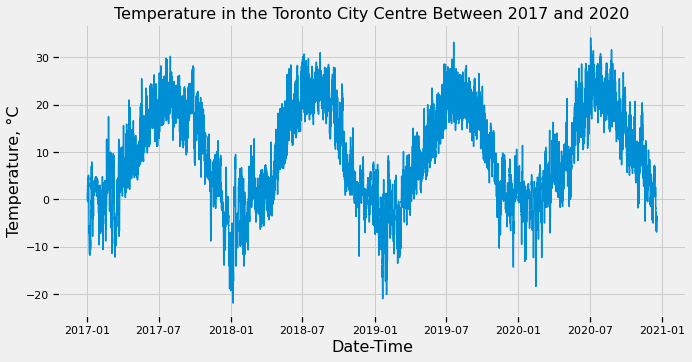

In [28]:
plt.figure(figsize=(10,5))
temp=sns.lineplot(x=df_weather_data.index,y=df_weather_data['temp_c'])
temp.axes.set_title("Temperature in the Toronto City Centre Between 2017 and 2020",
                      fontsize=16)
temp.set_ylabel("Temperature, °C",
                  fontsize=16)
temp.set_xlabel("Date-Time",
                  fontsize=16)
plt.show()


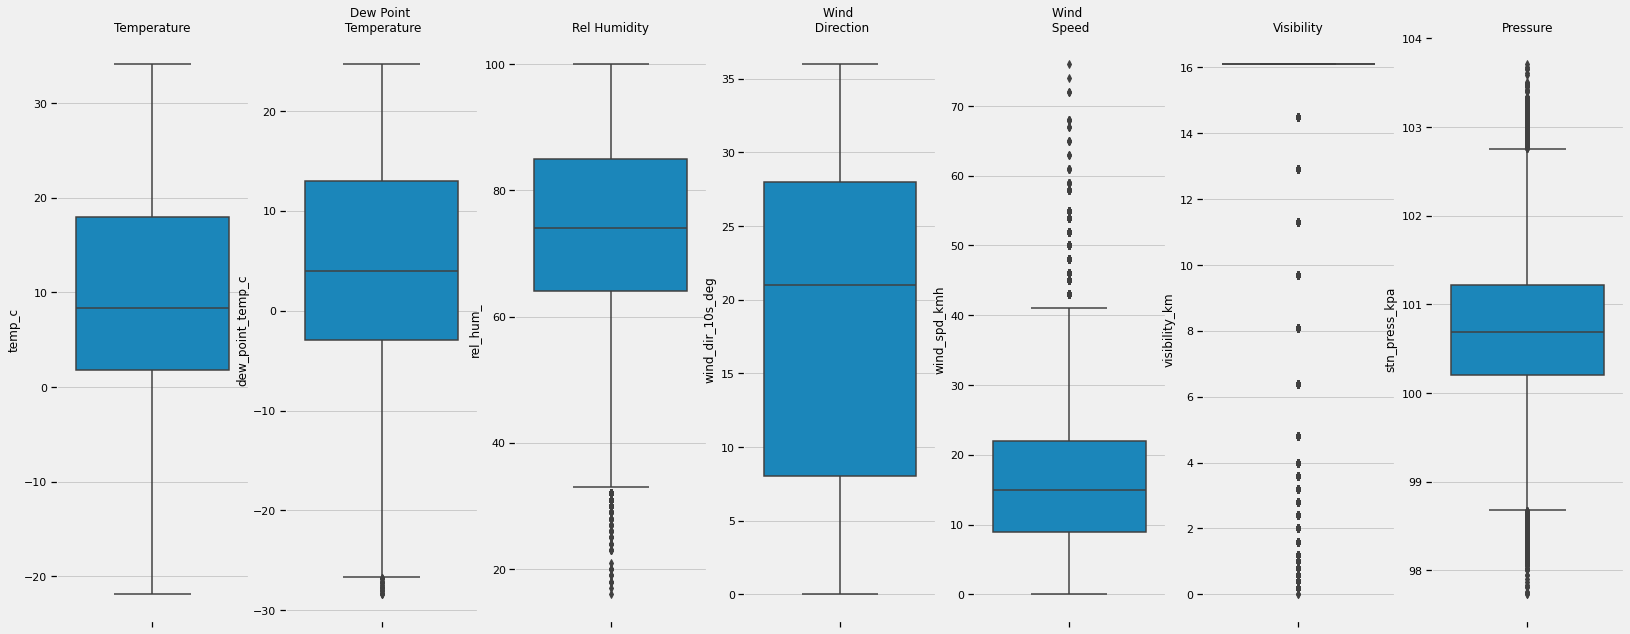

In [29]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1,7,figsize = (25,10))

sns.boxplot(y = 'temp_c', data = df_weather_data, ax = ax1)
ax1.set_title('Temperature')

sns.boxplot(y = 'dew_point_temp_c', data = df_weather_data, ax = ax2)
ax2.set_title('Dew Point \n Temperature')

sns.boxplot(y = 'rel_hum_', data = df_weather_data, ax = ax3)
ax3.set_title('Rel Humidity')

sns.boxplot(y = 'wind_dir_10s_deg', data = df_weather_data, ax = ax4)
ax4.set_title('Wind \n Direction')

sns.boxplot(y = 'wind_spd_kmh', data = df_weather_data, ax = ax5)
ax5.set_title('Wind \n Speed')

sns.boxplot(y = 'visibility_km', data = df_weather_data, ax = ax6)
ax6.set_title('Visibility')

sns.boxplot(y = 'stn_press_kpa', data = df_weather_data, ax = ax7)
ax7.set_title('Pressure')

fig.show()

The reason why the boxplot for the visibility is not showing up is because a significant portion of the data indicate a visibility of 16.1 km. For this reason the 1st, 2nd and 3rd quartile is essentially the same value.

In [30]:
#Estimate quartile values for Visibility column
Q1=np.percentile(df_weather_data['visibility_km'], 25)  # Q1
Q2=np.percentile(df_weather_data['visibility_km'], 50)  # median
Q3=np.percentile(df_weather_data['visibility_km'], 75)  # Q3

print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)

Q1= 16.1
Q2= 16.1
Q3= 16.1


Because of the high number of clear weather days in the data set, it is very plausible that there is also high number of records indicate 16.1 km (or higher) of visibility distance. 

In [31]:
print('{:.2f}% of the weather records indicate a visibility 16.1 km or higher. Similarly {:.2f}% of the days are have clear skies'
      .format((df_weather_data['visibility_km'] >= 16.1).sum()/df_weather_data.shape[0]*100
              , (df_weather_data['weather'] == 'clear_day').sum()/df_weather_data.shape[0]*100))

87.06% of the weather records indicate a visibility 16.1 km or higher. Similarly 84.07% of the days are have clear skies


The final process in the data wrangling process is to export the manipulated data as a csv for easy access. 

In [32]:
#Export the weather dataframe in csv format
df_weather_data.to_csv('cleaned_weather_data_set.csv')

# 5. Bike Share Trip Data - Import Data

In this section,  a dataframe is created containing the historical ridership data in Toronto from January 2017 to October 2020. The bike trip data was provided in csv format with one file for every month.

The main challenge with merging these csv files is the change in column field between 2018 and 2019. For example, the bike triip data from 2017 and 2019 contain 9 fields, while the bike trip data from 2019 and 2020 contain 11 fields. 

It as also been identified that the date/time indicated in the 2017/2018 data is in UTC while the 2019/2020 data is in EST. The date/time will be localized to the appropriate time zone during the importation process. 

In [2]:
# Create a list of file names for bike share trips data contained in repository
trips_filenames = [filename for filename in os.listdir() if 'bike_share' in filename]

# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
trips_data = {filename: pd.read_csv(filename) for filename in trips_filenames}

# Now let's print out the column names for the first month of each year
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))

2017
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']

2018
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']

2019
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2020
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']



To overcome this issue, we initially built two dataframes, one for the 2017 and 2018 dataset and another one for the 2018 and 2019 dataset. Once accounted for the missing fields in the 2017 and 2018 dataset, the differences in the field names between the 2017/2018 and 2019/2020 dataset, differences in the reflected time zones, the dataframes were concatenated to create one dataframe containing all the bike trip data from 2017 to 2020.

In [113]:
# Build two data frames to be merged later
df_trips_data = pd.DataFrame()
df_trips_data2 = pd.DataFrame()

for file in trips_filenames:
    if '2017' in file:
        df_trips_data= pd.concat([df_trips_data,pd.read_csv(file)],axis =0)

#Add the 2018 files to the dataframe
for file in trips_filenames:
    if '2018' in file:
        df_trips_data= pd.concat([df_trips_data,pd.read_csv(file)], axis =0)

#Correct column names and add additional columns for Bike ID and subscription ID
df_trips_data['Bike Id'] = np.nan
df_trips_data['Subscription Id'] = np.nan

#Convert columns trip start and end times to datetimes. Then, localize to UTC then convert to EST
df_trips_data['trip_start_time']=df_trips_data['trip_start_time'].str.split("(").str[0] 
df_trips_data['trip_start_time']=pd.to_datetime(df_trips_data['trip_start_time'])
df_trips_data['trip_start_time']=df_trips_data['trip_start_time'].dt.tz_localize(tz='UTC')
df_trips_data['trip_start_time']=df_trips_data['trip_start_time'].dt.tz_convert(tz='EST')

df_trips_data['trip_stop_time']=df_trips_data['trip_stop_time'].str.split("(").str[0] 
df_trips_data['trip_stop_time']=pd.to_datetime(df_trips_data['trip_stop_time'])
df_trips_data['trip_stop_time']=df_trips_data['trip_stop_time'].dt.tz_localize(tz='UTC')
df_trips_data['trip_stop_time']=df_trips_data['trip_stop_time'].dt.tz_convert(tz='EST')

#correct the order of the columns to match the 2019/2020 data
cols = df_trips_data.columns.tolist()
new_order = [0,10,3,4,1,5,6,2,7,9,8]
cols = [cols[i] for i in new_order]

#reorder columns of the Data frame
df_trips_data = df_trips_data[cols]

#rename column headers of the data frame
df_trips_data.columns = trips_data['bike_share_2019-1.csv'].columns.tolist()

#complete the reading of all the files to the second dataframe
for file in trips_filenames:
    if ('2019' in file) |('2020' in file) :
        df_trips_data2  = pd.concat([df_trips_data2 ,pd.read_csv(file)], axis=0)

# Let's remove double spaces from the column names
df_trips_data.columns = ['_'.join(col.split()).lower() for col in df_trips_data.columns]  
df_trips_data2.columns = ['_'.join(col.split()).lower() for col in df_trips_data2.columns]  

#Convert columns trip start and end times to datetimes. Then, localize to EST
df_trips_data2['start_time']=df_trips_data2['start_time'].str.split("(").str[0] 
df_trips_data2['start_time']=pd.to_datetime(df_trips_data2['start_time'])
df_trips_data2['start_time']=df_trips_data2['start_time'].dt.tz_localize(tz='EST')

df_trips_data2['end_time']=df_trips_data2['end_time'].str.split("(").str[0] 
df_trips_data2['end_time']=pd.to_datetime(df_trips_data2['end_time'])
df_trips_data2['end_time']=df_trips_data2['end_time'].dt.tz_localize(tz='EST')

#Combine the two dataframes
df_trips_data=pd.concat([df_trips_data ,df_trips_data2], axis=0)

#view data frame   
df_trips_data.head()

,trip_id,subscription_id,trip_duration,start_station_id,start_time,start_station_name,end_station_id,end_time,end_station_name,bike_id,user_type
0,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,NaN,Member
1,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,NaN,Member
2,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,NaN,Member
3,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),NaN,Member
4,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,NaN,Member


In [35]:
#Export the combined bike trip dataframe in csv format
#df_trips_data.to_csv('combined_trip_data_set.csv')

# 6. Bike Share Trip Data - Data Wrangling

In [ ]:
#import the bike share combined dataframe
df_trips_data=pd.read_csv('combined_trip_data_set.csv')

#df_trips_data.columns
df_trips_data.drop(['Unnamed: 0'], axis=1, inplace=True)

#Set the trip_id as the index as it is a unique identifier
#df_trips_data.set_index('trip_id', inplace = True)

The trip ID is an unique identifier for each trip. It is important to verify that the bike trips contained in the concatenated dataframe do not include duplicate IDs. 

In [114]:
print("There are {:.0f} bike trips taken from January 2017 to November 2020".format(df_trips_data.shape[0]))

print("{:.0f} % of the trip Id's are unique".format(df_trips_data['trip_id'].nunique()/df_trips_data.shape[0]*100))


There are 8467545 bike trips taken from January 2017 to November 2020
100 % of the trip Id's are unique


Special characters tend to cause issues in the code so we will create a new column containing the station names with the special characters removed.

In [115]:
# create new column field with station name - convert to lower case and remove all punctuation from string
df_trips_data['start_station_name_npl'] = [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in df_trips_data['start_station_name']]
df_trips_data['end_station_name_npl'] = [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in df_trips_data['end_station_name']]

#Dataframe does not recognize nan in these columns as null values so correct for this
df_trips_data['start_station_name_npl'] = df_trips_data['start_station_name_npl'].replace('nan', np.NaN)
df_trips_data['end_station_name_npl'] =df_trips_data['end_station_name_npl'].replace('nan', np.NaN)

# remove trailing white spaces
df_trips_data['start_station_name'] = df_trips_data['start_station_name'].str.strip()
df_trips_data['end_station_name'] = df_trips_data['end_station_name'].str.strip()

df_trips_data.head()

,trip_id,subscription_id,trip_duration,start_station_id,start_time,start_station_name,end_station_id,end_time,end_station_name,bike_id,user_type,start_station_name_npl,end_station_name_npl
0,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,NaN,Member,bay st college st east side,bay st albert st
1,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,NaN,Member,niagara st richmond st w,king st w fraser ave
2,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,NaN,Member,front st yonge st hockey hall of fame,church st wood st
3,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),NaN,Member,east liberty st pirandello st,queen st w york st city hall
4,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,NaN,Member,bathurst st queens quay w,king st w spadina ave


In [116]:
df_trips_data['start_station_name'].unique()

array(['Bay St / College St (East Side)', 'Niagara St / Richmond St W',
       'Front St / Yonge St (Hockey Hall of Fame)',
       'East Liberty St / Pirandello St', 'Bathurst St / Queens Quay W',
       'Queen St W / Gladstone Ave', 'Madison Ave / Bloor St W',
       'Fort York  Blvd / Capreol Crt', 'College St W / Major St',
       'College St W / Borden St', 'Church St / Alexander St',
       'Wellesley St E / Yonge St Green P', 'Bay St / St. Joseph St',
       'Simcoe St / Queen St W', 'Dundas St E / Regent Park Blvd',
       'Front St / Bay St (North Side)', 'Bay St / Albert St',
       'King St W / Bay St (West Side)', 'Queens Quay / Yonge St',
       'Victoria St / Gould St (Ryerson University)',
       'Temperance St / Yonge St', 'King St W / Fraser Ave',
       'King St E / Jarvis St', 'Bay St / Davenport Rd',
       'Wellington St W / Portland St', 'Seaton St / Dundas St E',
       'Bremner Blvd / Spadina Ave', 'Dundas St W / Crawford St',
       'Princess St / Adelaide St', 

In [117]:
#Percentage of Data Containing Null Record
trips_data_missing = pd.DataFrame(df_trips_data.isnull().sum())
trips_data_missing = trips_data_missing.rename(columns={0:"count"})
trips_data_missing['percent_nulldata']=round(trips_data_missing['count']/df_trips_data.shape[0] * 100,1)

trips_data_missing

,count,percent_nulldata
trip_id,0,0.0
subscription_id,3415324,40.3
trip_duration,0,0.0
start_station_id,1026893,12.1
start_time,0,0.0
start_station_name,164,0.0
end_station_id,1028159,12.1
end_time,1,0.0
end_station_name,1409,0.0
bike_id,3415324,40.3


Remove trip record if both the Station Id and Station Name is missing. There is not enough information in these records to determine start and end locations of the trip. These records will not be useful for our analysis. 

In [118]:
df_trips_data = df_trips_data[~(df_trips_data['start_station_name'].isnull() & df_trips_data['start_station_id'].isnull())]
df_trips_data = df_trips_data[~(df_trips_data['end_station_name'].isnull() & df_trips_data['end_station_id'].isnull())]
df_trips_data.shape

(8466278, 13)

Now let's evaluate again what the count/percentage of null data is in the bike trip dataset. 

In [119]:
#Percentage of Data Containing Null Record
trips_data_missing = pd.DataFrame(df_trips_data.isnull().sum())
trips_data_missing = trips_data_missing.rename(columns={0:"count"})
trips_data_missing['percent_nulldata']=round(trips_data_missing['count']/df_trips_data.shape[0] * 100,1)

trips_data_missing

,count,percent_nulldata
trip_id,0,0.0
subscription_id,3415323,40.3
trip_duration,0,0.0
start_station_id,1026892,12.1
start_time,0,0.0
start_station_name,164,0.0
end_station_id,1026892,12.1
end_time,0,0.0
end_station_name,142,0.0
bike_id,3415323,40.3


## Determine Missing Station ID from Available Station Name
A number of the station ID's are missing in the bike trip dataframe. These could be determined if the station name is available. The information about each station, including the station name, id, location (longitude and latitude), and capacity, is provided in the csv file called "bikeshare_stations.csv" located in the repository. 

In [120]:
#Import the bikeshare station data
stations = pd.read_csv('bikeshare_stations.csv')

print("There are {:.0f} bike stations across Toronto".format(stations.shape[0]))

# Remove spaces in the dataframe column names
stations.columns = [s.replace(' ','_').lower() for s in stations.columns ]

# Similar to bike trip dataframe, we will create new column with station name but with all special characters removed
stations['station_name_npl'] =[s.translate(str.maketrans('', '', string.punctuation)).lower() for s in stations['station_name']]

# Remove trailing white spaces
stations['station_name']=stations['station_name'].str.strip()

stations.head()

There are 610 bike stations across Toronto


,station_id,station_name,lat,lon,capacity,station_name_npl
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35,fort york blvd capreol ct
1,7001,Lower Jarvis St / The Esplanade,43.647830,-79.370698,15,lower jarvis st the esplanade
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19,st george st bloor st w
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15,madison ave bloor st w
4,7004,University Ave / Elm St,43.656518,-79.389099,11,university ave elm st


## Find Missing Station Names based on Station ID

# Greig to verify the change made to his code. This was the function that was resulting in numbers in the station name. I think I figured out what the issue was - should be station name instead of station id for "stations[stations['station_id'] == stat_id]['station_name'].tolist()[0]" and also added code to made same change to npl column

# seems to be working

In [121]:
print('Number of records in Trip Dataframe: ', df_trips_data.shape[0])
df_trips_data2 = df_trips_data.copy()

Number of records in Trip Dataframe:  8466278


In [122]:
#Station Name Replacement based on Station ID
def id_name_find_replace(df,feature):
    
    #build feature name
    feature_name = feature+'_station_name'
    feature_name_npl = feature+'_station_name_npl'
    feature_Id = feature+'_station_id'
    
    #strip records with missing name from the data frame to work with smaller data frame
    df_missing_name = df[df[feature_name].isnull() & df[feature_Id].notnull()]
    df = df[~(df[feature_name].isnull() & df[feature_Id].notnull())]
    
    #generate a list of unqiue id's in the dataframe with missing station names
    lst_id = df_missing_name[feature_Id].unique().tolist()
    #itterate through list
    for stat_id in lst_id:
        #create a mask of all the records with the ID for writing the correct name
        mask = df_missing_name[feature_Id] == stat_id
        # write the name of the station linked to the station Id in the stations data frame
        df_missing_name.loc[mask,feature_name] = stations[stations['station_id'] == stat_id]['station_name'].tolist()[0]
        df_missing_name.loc[mask,feature_name_npl] = stations[stations['station_id'] == stat_id]['station_name_npl'].tolist()[0]
    #append the modified data frame back to the original data frame and return  
    return df.append(df_missing_name)

#run the find/replace function for both the start and the end stations
df_trips_data = id_name_find_replace(df_trips_data,'start')
df_trips_data = id_name_find_replace(df_trips_data,'end')

#view data frame
df_trips_data.head()

,trip_id,subscription_id,trip_duration,start_station_id,start_time,start_station_name,end_station_id,end_time,end_station_name,bike_id,user_type,start_station_name_npl,end_station_name_npl
0,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,NaN,Member,bay st college st east side,bay st albert st
1,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,NaN,Member,niagara st richmond st w,king st w fraser ave
2,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,NaN,Member,front st yonge st hockey hall of fame,church st wood st
3,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),NaN,Member,east liberty st pirandello st,queen st w york st city hall
4,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,NaN,Member,bathurst st queens quay w,king st w spadina ave


In [123]:
print('Number of records in Trip Dataframe: ', df_trips_data.shape[0])
df_trips_data2 = df_trips_data.copy()

Number of records in Trip Dataframe:  8466278


In [124]:
df_trips_data[df_trips_data['end_station_name'].str.isnumeric()]

,trip_id,subscription_id,trip_duration,start_station_id,start_time,start_station_name,end_station_id,end_time,end_station_name,bike_id,user_type,start_station_name_npl,end_station_name_npl


By populating the station name based on the available station id, we no longer have any records with missing station names.

In [125]:
#Percentage of Data Containing Null Record
trips_data_missing = pd.DataFrame(df_trips_data.isnull().sum())
trips_data_missing = trips_data_missing.rename(columns={0:"count"})
trips_data_missing['percent_nulldata']=round(trips_data_missing['count']/df_trips_data.shape[0] * 100,1)

trips_data_missing

,count,percent_nulldata
trip_id,0,0.0
subscription_id,3415323,40.3
trip_duration,0,0.0
start_station_id,1026892,12.1
start_time,0,0.0
start_station_name,0,0.0
end_station_id,1026892,12.1
end_time,0,0.0
end_station_name,0,0.0
bike_id,3415323,40.3


## Find Missing Station ID based on Station Name

Define a custom function to determine the station id from the available station name. 

In [126]:
def simple_replace_station_ID(df, feature):
    #search stations data frame for missing ID's
    #create list of unique start station names
    feature_name = feature+'_station_name'
    feature_name_npl = feature+'_station_name_npl'
    feature_Id = feature+'_station_id'
    
    #strip data frame of missing station Id's from from data frame
    df_missing_station_id = df[df[feature_Id].isnull()]
    df = df[df[feature_Id].notnull()]
    
    #generate list of unique station names in missing names data frame
    lst_station_names = df_missing_station_id[feature_name_npl].unique().tolist()
    
    #itterate through list and replace station Id's if a positive match for the station name is found
    for name in lst_station_names:
        #check name exists in list of station names
        stations_mask = stations['station_name_npl'] == name
        if stations_mask.sum()>0:
            #generate mask of records to be replaced
            mask = df_missing_station_id[feature_name_npl] == name
            #read station id from stations data frame
            station_id = stations[stations_mask]['station_id'].to_numpy()[0]
            #replace id in missing stations id data frame
            df_missing_station_id.loc[mask,feature_Id] = station_id
    #append corrected data frame to the orginal data frame and return the data frame
    return df.append(df_missing_station_id)

#run the name id replace search for both the start and the end stations
df_trips_data = simple_replace_station_ID(df_trips_data,'start')
df_trips_data = simple_replace_station_ID(df_trips_data,'end')

print(df_trips_data.shape)
df_trips_data.head()

(8466278, 13)


,trip_id,subscription_id,trip_duration,start_station_id,start_time,start_station_name,end_station_id,end_time,end_station_name,bike_id,user_type,start_station_name_npl,end_station_name_npl
0,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,NaN,Member,bay st college st east side,bay st albert st
1,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,NaN,Member,niagara st richmond st w,king st w fraser ave
2,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,NaN,Member,front st yonge st hockey hall of fame,church st wood st
3,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),NaN,Member,east liberty st pirandello st,queen st w york st city hall
4,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,NaN,Member,bathurst st queens quay w,king st w spadina ave


The number of trip records with null station id is reduced from 12.1% to 2.4% by identifying the station id from the given station names. 

In [127]:
#Percentage of Data Containing Null Record
trips_data_missing = pd.DataFrame(df_trips_data.isnull().sum())
trips_data_missing = trips_data_missing.rename(columns={0:"count"})
trips_data_missing['percent_nulldata']=round(trips_data_missing['count']/df_trips_data.shape[0] * 100,1)

trips_data_missing

,count,percent_nulldata
trip_id,0,0.0
subscription_id,3415323,40.3
trip_duration,0,0.0
start_station_id,201927,2.4
start_time,0,0.0
start_station_name,0,0.0
end_station_id,201928,2.4
end_time,0,0.0
end_station_name,0,0.0
bike_id,3415323,40.3


In [128]:
df_trips_data[df_trips_data['end_station_name'].str.isnumeric()]

,trip_id,subscription_id,trip_duration,start_station_id,start_time,start_station_name,end_station_id,end_time,end_station_name,bike_id,user_type,start_station_name_npl,end_station_name_npl


# Variations in Spelling / Naming convention


In this section, we use the FuzzyWuzzy library to clean up inconsistent data entries. In the dataset, there are variations of the same word such as: 

>Front St W vs Front St

>Lakeshore vs Lake Shore

These inconsistencies prevent us from assigning station ids from the station names because the code is unable to distinguish between the name variations. The fuzzywuzzy package helps to identify which string are closest to each other.

>Fuzzy matching: The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. 

In [129]:
print('Number of records in Trip Dataframe: ', df_trips_data.shape[0])
df_trips_data2 = df_trips_data.copy()

Number of records in Trip Dataframe:  8466278


### Token Set Approach

The fuzzywyuzzy library has various ways in which the 'match' score can be calculated. For the first function we have used the token set approach. Using this approach, we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string. We used a score greater than 90 (out of 100) to be considered a confident match. 

# Simplified the code a bit further no longer need 2 fuzzy functions

In [130]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column_fuzzysearch(df, column, feature, string_to_match, index, fuzz_token, min_ratio = 90):
    ,
    # find unique station names contained
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzz_token)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    
    
    # get the rows of all the close matches in our dataframe
    row_mask = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[row_mask, column] = string_to_match
    
    #replace id in missing stations id data frame
    df.loc[row_mask,feature] = stations.loc[index, 'station_id']
    return df

In [138]:
df_trips_data = df_trips_data2.copy()

In [139]:
#process missing start stations through fuzzywuzzy function
print('Trips Shape: ', df_trips_data.shape) # test to verify no data loss
df_missing_station_id = df_trips_data[df_trips_data['start_station_id'].isnull()]
print ('Missing shape: ',df_missing_station_id.shape)
df_trips_data = df_trips_data[df_trips_data['start_station_id'].notnull()]
print('Trips Shape: ', df_trips_data.shape) # test to verify no data loss
for i in range(len(stations)):
    df_missing_station_id=replace_matches_in_column_fuzzysearch(df=df_missing_station_id, column='start_station_name_npl', 
                                                        feature='start_station_id', index = i, fuzz_token = fuzzywuzzy.fuzz.token_set_ratio,
                                                        string_to_match=stations['station_name_npl'][i])  
    
    #append back to original data frame
df_trips_data = df_trips_data.append(df_missing_station_id)
df_trips_data.sort_index(inplace=True)
print('Trips Shape: ', df_trips_data.shape) # test to verify no data loss

#process missing end stations through fuzzywuzzy function
df_missing_station_id = df_trips_data[df_trips_data['end_station_id'].isnull()]
df_trips_data = df_trips_data[df_trips_data['end_station_id'].notnull()]

for i in range(len(stations)):
    df_missing_station_names=replace_matches_in_column_fuzzysearch(df=df_missing_station_id, column='end_station_name_npl', 
                                                                   feature='end_station_id', index = i, fuzz_token = fuzzywuzzy.fuzz.token_set_ratio,
                                                                   string_to_match=stations['station_name_npl'][i])  

df_trips_data = df_trips_data.append(df_missing_station_id)
df_trips_data.sort_index(inplace=True)
print(df_trips_data.shape) # test to verify no data loss

Trips Shape:  (8466278, 13)
Missing shape:  (201927, 13)
Trips Shape:  (8264351, 13)
Trips Shape:  (8466278, 13)
(8466278, 13)


## No Data loss

In [133]:
#Percentage of Data Containing Null Record
trips_data_missing = pd.DataFrame(df_trips_data.isnull().sum())
trips_data_missing = trips_data_missing.rename(columns={0:"count"})
trips_data_missing['percent_nulldata']=round(trips_data_missing['count']/df_trips_data.shape[0] * 100,1)

trips_data_missing

,count,percent_nulldata
trip_id,0,0.0
subscription_id,3415323,40.3
trip_duration,0,0.0
start_station_id,73368,0.9
start_time,0,0.0
start_station_name,0,0.0
end_station_id,74851,0.9
end_time,0,0.0
end_station_name,0,0.0
bike_id,3415323,40.3


### Token Sort Approach

The second function applies a different scoring approach called the token sort. The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string. Again, we used a score greater than 90 (out of 100) to be considered a confident match. 

In [140]:
#process missing start stations through fuzzywuzzy function
print('Trips Shape: ', df_trips_data.shape) # test to verify no data loss
df_missing_station_id = df_trips_data[df_trips_data['start_station_id'].isnull()]
print ('Missing shape: ',df_missing_station_id.shape)
df_trips_data = df_trips_data[df_trips_data['start_station_id'].notnull()]
print('Trips Shape: ', df_trips_data.shape) # test to verify no data loss
for i in range(len(stations)):
    df_missing_station_id=replace_matches_in_column_fuzzysearch(df=df_missing_station_id, column='start_station_name_npl', 
                                                        feature='start_station_id', index = i, fuzz_token = fuzzywuzzy.fuzz.token_sort_ratio,
                                                        string_to_match=stations['station_name_npl'][i], min_ratio=85)  
    
    #append back to original data frame
df_trips_data = df_trips_data.append(df_missing_station_id)
df_trips_data.sort_index(inplace=True)
print('Trips Shape: ', df_trips_data.shape) # test to verify no data loss

#process missing end stations through fuzzywuzzy function
df_missing_station_id = df_trips_data[df_trips_data['end_station_id'].isnull()]
df_trips_data = df_trips_data[df_trips_data['end_station_id'].notnull()]

for i in range(len(stations)):
    df_missing_station_names=replace_matches_in_column_fuzzysearch(df=df_missing_station_id, column='end_station_name_npl', 
                                                                   feature='end_station_id', index = i, fuzz_token = fuzzywuzzy.fuzz.token_sort_ratio,
                                                                   string_to_match=stations['station_name_npl'][i],min_ratio=85)  

df_trips_data = df_trips_data.append(df_missing_station_id)
df_trips_data.sort_index(inplace=True)
print(df_trips_data.shape) # test to verify no data loss

Trips Shape:  (8466278, 13)
Missing shape:  (73368, 13)
Trips Shape:  (8392910, 13)
Trips Shape:  (8466278, 13)
(8466278, 13)


In [141]:
#Percentage of Data Containing Null Record
trips_data_missing = pd.DataFrame(df_trips_data.isnull().sum())
trips_data_missing = trips_data_missing.rename(columns={0:"count"})
trips_data_missing['percent_nulldata']=round(trips_data_missing['count']/df_trips_data.shape[0] * 100,1)

trips_data_missing

,count,percent_nulldata
trip_id,0,0.0
subscription_id,3415323,40.3
trip_duration,0,0.0
start_station_id,69938,0.8
start_time,0,0.0
start_station_name,0,0.0
end_station_id,71078,0.8
end_time,0,0.0
end_station_name,0,0.0
bike_id,3415323,40.3


In [142]:
df_trips_data[df_trips_data['start_station_id'].isnull()]['start_station_name'].unique().tolist()

['Michael Sweet Ave / St. Patrick St',
 'Bay St / Davenport Rd',
 'Bremner Blvd / Spadina Ave',
 'Wellesley St E / Yonge St (Green P)',
 'Bloor St / Brunswick Ave',
 'Roxton Rd / College St',
 'Ontario Place Blvd / Remembrance Dr',
 'Bathurst St / Queens Quay W',
 'Lansdowne Subway Green P',
 'Dockside Dr / Queens Quay E (Sugar Beach)',
 'Simcoe St / Dundas St W',
 'Margueretta St / College St',
 'Fringe Next Stage - 7219',
 'Queen St E / Larchmount Ave',
 'Stephenson Ave / Main St',
 'Woodbine Subway Green P (Cedarvale Ave)',
 'Base Station']

## Final Outstanding Station Names

The final outstanding station less that 1% of the data frame can be removed. The locations of each station can then be added to the data frame so that the distance of each trip can be calculated. 


Justification for droping the remainder of the data - For `trips_data`, we can see that `'End Station Id'` and `'End Station Name'` have 454 missing values, which is only 0.01% of the dataset. This might suggest corruption and given the small number of missing values, we can safetly drop these rows. 

In [158]:
#create a backup for safe keeping
df_trips_data2 = df_trips_data.copy()

In [166]:
df_trips_data = df_trips_data[df_trips_data['start_station_id'].notnull() & df_trips_data['end_station_id'].notnull()]
print('Number of records in Trip Dataframe: ', df_trips_data.shape[0])

Number of records in Trip Dataframe:  8334844


In [167]:
df_trips_data = df_trips_data2.copy()

In [168]:
#merge the stations data frame and the df_trips_data
df_stations = stations[['station_id', 'lat', 'lon']]
#add start stations location
df_trips_data = pd.merge(df_trips_data,df_stations, left_on = 'start_station_id', right_on = 'station_id', how = 'left')
df_trips_data.rename(columns = {'lat':'start_station_lat', 'lon': 'start_station_lon'},inplace = True)
df_trips_data.drop('station_id', axis = 1, inplace = True)
#add end stations location
df_trips_data = pd.merge(df_trips_data,df_stations, left_on = 'end_station_id', right_on = 'station_id', how = 'left')
df_trips_data.rename(columns = {'lat':'end_station_lat', 'lon': 'end_station_lon'},inplace = True)
df_trips_data.drop('station_id', axis = 1, inplace = True)

df_trips_data

,trip_id,subscription_id,trip_duration,start_station_id,start_time,start_station_name,end_station_id,end_time,end_station_name,bike_id,user_type,start_station_name_npl,end_station_name_npl,start_station_lat,start_station_lon,end_station_lat,end_station_lon
0,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,NaN,Member,bay st college st east side,bay st albert st,43.660439,-79.385525,43.653264,-79.382458
1,2961180,NaN,1824,7012.0,2018-06-01 00:00:00-05:00,Elizabeth St / Edward St (Bus Terminal),7157.0,2018-06-01 00:30:00-05:00,Dufferin St / Bloor St,NaN,Annual Member,elizabeth st edward st bus terminal,dufferin st bloor st,43.656026,-79.385327,43.660833,-79.435833
2,4158592,NaN,749,7061.0,2018-10-01 00:01:00-05:00,Dalton Rd / Bloor St W,7042.0,2018-10-01 00:14:00-05:00,Sherbourne St / Wellesley St E,NaN,Annual Member,dalton rd bloor st w,sherbourne st wellesley st e,43.666294,-79.406643,43.667300,-79.374000
3,4357633,NaN,167,7089.0,2018-11-01 00:01:00-05:00,Church St / Wood St,7077.0,2018-11-01 00:04:00-05:00,College Park South,NaN,Annual Member,church st wood st,college park south,43.662712,-79.379903,43.659777,-79.382767
4,4482330,NaN,1388,7236.0,2018-12-01 00:00:00-05:00,Thompson St / Broadview Ave - SMART,7011.0,2018-12-01 00:23:00-05:00,Wellington St W / Portland St,NaN,Annual Member,thompson st broadview ave smart,wellington st w portland st,43.659471,-79.350325,43.642982,-79.399256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334839,9476679,694267.0,938,7154.0,2020-08-31 23:59:00-05:00,Bathurst Subway Station,7238.0,2020-01-09 00:15:00-05:00,Sorauren/Geoffrey (Sorauren Park) - SMART,6836.0,Annual Member,bathurst subway station,soraurengeoffrey sorauren park smart,43.666667,-79.411667,43.649172,-79.444509
8334840,9476681,628935.0,592,7012.0,2020-08-31 23:59:00-05:00,Elizabeth St / Edward St (Bus Terminal),7100.0,2020-01-09 00:09:00-05:00,Dundas St E / Regent Park Blvd,4125.0,Annual Member,elizabeth st edward st bus terminal,dundas st e regent park blvd,43.656026,-79.385327,43.660207,-79.361275
8334841,9476682,780037.0,843,7076.0,2020-08-31 23:59:00-05:00,York St / Queens Quay W,7041.0,2020-01-09 00:13:00-05:00,Edward St / Yonge St,5929.0,Casual Member,york st queens quay w,edward st yonge st,43.640132,-79.380464,43.656729,-79.382736
8334842,9476683,498701.0,420,7038.0,2020-08-31 23:59:00-05:00,Dundas St W / Yonge St,7044.0,2020-01-09 00:06:00-05:00,Church St / Alexander St,4113.0,Annual Member,dundas st w yonge st,church st alexander st,43.656094,-79.381484,43.663722,-79.380288


# 7. Bike Trip Data - Outliers

In this section, we will determine what kind of outliers we have in the data set. 

Outliers in datasets can be both good and bad. One the one hand, they may contain important information while on the other hand, they skew your visualizations and may bias your models.

Below shows the summary statistics for bike trip dataset using .describe().

In [169]:
df_trips_data.describe()

,trip_id,subscription_id,trip_duration,start_station_id,end_station_id,bike_id,start_station_lat,start_station_lon,end_station_lat,end_station_lon
count,8.334844e+06,5.050955e+06,8.334844e+06,8.334844e+06,8.334844e+06,5.050955e+06,8.334561e+06,8.334561e+06,8.334359e+06,8.334359e+06
mean,5.562613e+06,4.852057e+05,1.066382e+03,7.179098e+03,7.178419e+03,3.146359e+03,4.365420e+01,-7.939111e+01,4.365345e+01,-7.939065e+01
std,2.746812e+06,1.668259e+05,1.155151e+04,1.453657e+02,1.451009e+02,1.693900e+03,1.420237e-02,2.948884e-02,1.387315e-02,2.980248e-02
min,7.123820e+05,6.537700e+04,0.000000e+00,7.000000e+03,7.000000e+03,1.400000e+01,4.358808e+01,-7.954583e+01,4.358808e+01,-7.954583e+01
25%,3.228806e+06,3.373850e+05,4.400000e+02,7.051000e+03,7.051000e+03,1.844000e+03,4.364521e+01,-7.940320e+01,4.364483e+01,-7.940276e+01
50%,5.582154e+06,4.751620e+05,7.200000e+02,7.158000e+03,7.158000e+03,3.222000e+03,4.365269e+01,-7.938783e+01,4.365212e+01,-7.938758e+01
75%,7.954472e+06,6.056830e+05,1.136000e+03,7.270000e+03,7.269000e+03,4.399000e+03,4.366266e+01,-7.937850e+01,4.366167e+01,-7.937758e+01
max,1.029388e+07,8.634190e+05,1.240378e+07,7.667000e+03,7.667000e+03,6.927000e+03,4.378832e+01,-7.912351e+01,4.378832e+01,-7.912351e+01


In [ ]:
#caculate trip distance
import 